In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
pip install scapy

In [17]:
from scapy.all import rdpcap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import AnchoredText

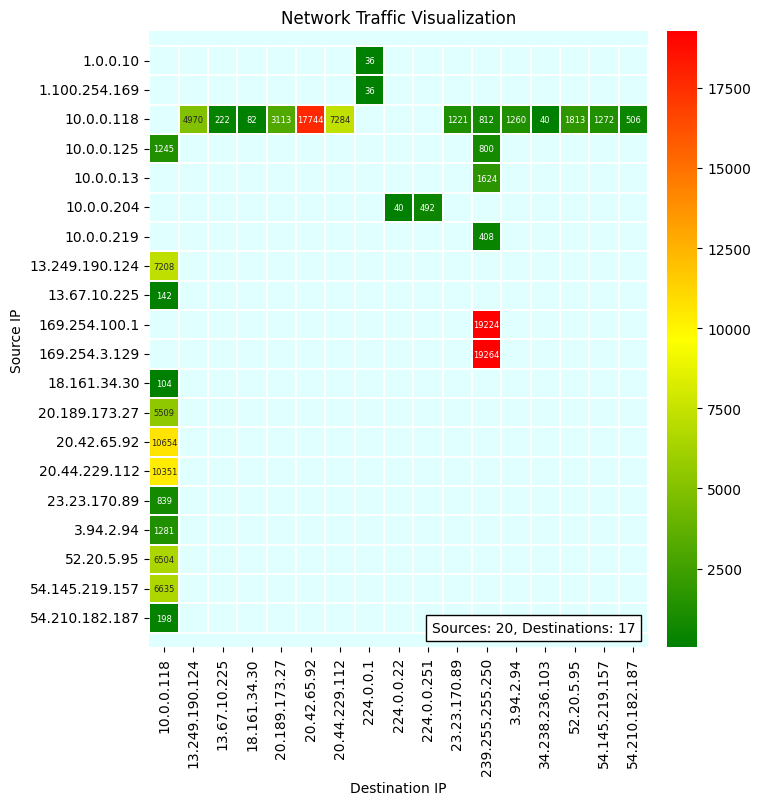

In [23]:

# Initialize an empty dictionary to store packet information
packets_info = {
    'SrcIP': [],
    'DstIP': [],
    'Size': [],
}

def extract_packets(packet_data):
    # Extract IP layer details if available
    for packet in packet_data:
        if packet.haslayer('IP'):
            packets_info['SrcIP'].append(packet['IP'].src)
            packets_info['DstIP'].append(packet['IP'].dst)
            packets_info['Size'].append(packet['IP'].len)

def visualize_traffic(visualize):
    packet_details = []

    # Compile packet details for DataFrame creation
    for index in range(len(packets_info['SrcIP'])):
        packet_details.append([packets_info['SrcIP'][index], packets_info['DstIP'][index], packets_info['Size'][index]])

    traffic_df = pd.DataFrame(packet_details, columns=['Source', 'Destination', 'Length'])

    # Create a pivot table to aggregate packet sizes
    traffic_summary = traffic_df.pivot_table(index=['Source', 'Destination'], values='Length', aggfunc='sum').reset_index()

    pivot_table = traffic_summary.pivot(index='Source', columns='Destination', values='Length')

    if visualize:
        generate_heatmap(pivot_table, traffic_summary['Source'].nunique(), traffic_summary['Destination'].nunique())

def generate_heatmap(traffic_data, num_sources, num_destinations):
    try:
        # Plot settings
        fig, axis = plt.subplots(figsize=(12, 8))
        sns.heatmap(traffic_data,
                    ax=axis,
                    linewidths=0.2,
                    annot=True,
                    fmt=".0f",
                    square=True,
                    cmap=LinearSegmentedColormap.from_list('color_scale', ["green", "yellow", "red"], N=256),
                    cbar_kws={'pad': 0.02},
                    annot_kws={"size":6}
                    )
        axis.set_title('Network Traffic Visualization')

        # Additional plot details
        anchored_text = AnchoredText(f"Sources: {num_sources}, Destinations: {num_destinations}", loc="lower right", frameon=True)
        axis.add_artist(anchored_text)
        axis.set_facecolor('lightcyan')
        plt.ylim(axis.get_ylim()[0]+0.5, axis.get_ylim()[1]-0.5)
        plt.xlabel('Destination IP')
        plt.ylabel('Source IP')
        plt.show()
        fig.savefig("network-traffic.png", bbox_inches="tight")

    except Exception as e:
        print("Error generating heatmap:", e)

def run_analysis():
    pcap_path = 'Network.pcapng'
    heatmap_required = True

    # Load packets from pcap file
    pcap_packets = rdpcap(pcap_path)
    extract_packets(pcap_packets)
    visualize_traffic(heatmap_required)

if __name__ == "__main__":
    run_analysis()
